# ELE510 Image Processing and Computer Vision: LAB, Exercise 5, Frequency-domain processing.

**Purpose:** *To learn about the Fourier Transform and its use for computation of the image Frequency Spectrum. The emphasis is on the fundamentals of digital images.*

Read the text carefully before starting the work. In many cases it is necessary to do some preparations before you start the work on the computer. Read the necessary theory and answer the theoretical part first. The theoretical and experimental part should be solved individually. The notebook must be approved by the lecturer or the teaching assistants. 

The theory for this exercise can be found in chapter 6 of the text book [1] and in appendix A.1.3 in the compendium [2]. See also the following documentations for help:
- [OpenCV](https://opencv.org/opencv-python-free-course/)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/contents.html)
- [scipy](https://docs.scipy.org/doc/)

<div class="alert alert-block alert-info">
Please, make sure that you have previously installed all the packages contained in the `requirements.txt` file.
</div>

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single PDF file. Read the `ELE510_Getting_started.pdf` file for more information.
</div>

## Note regarding the notebook

- You will find placeholders marked with `...` throughout the code. Your task is to replace each `...` with the appropriate code. Ensure that each placeholder is properly filled in to complete the implementation.

- The theoretical questions have to be answered directly on the notebook using the *Markdown* cells marked as **Answer here**. LaTex commands (if relevant) are available using the command `$...$`. You can also attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the markdown cell:

`![image name]("image_path")`

`<img src="image_path" alt="Alt text" title="Title text" />`

## Problem 1

The Fourier Transform is separable, that means that the two-dimensional transform is a sequence of two one-dimensional transforms. 
For images this can be considered as a transform along rows followed by a transform along columns (note that the input to the second step is the result from the first step, i.e. an image where the rows represents frequency and the columns space, $F(f_{x},y)$). 
To get a better understanding of the **DFT** it is therefore convenient to study the one-dimensional transform:

\begin{equation}
    G(k) = \sum_{x=0}^{w-1} g(x)e^{-j2\pi\frac{kx}{w}}, \qquad k = 0, 1, 2, \;\cdots\;,(w-1),
\end{equation}

and its inverse, **IDFT**:

\begin{equation}
    g(x) = \frac{1}{w}\sum_{k=0}^{w-1} G(k)e^{j2\pi\frac{kx}{w}}, \qquad  x = 0, 1, 2,\;\cdots\;,(w-1).
\end{equation}

One period of the signal is $g(x),\, x = 0, 1, 2,\;\cdots\;,(w-1)$ and in the frequency domain $F(k),\, k = 0, 1, 2, \;\cdots\;,(w-1)$.

**a)** Find the DC-component, $G(0)$. What does $\frac{G(0)}{w}$ represent?

**Answer here**

**b)** Show that the DFT is periodic, i.e. $G(k) = G(k+l\cdot w)$, where $l$ is an arbitrary integer.

**Answer here**

**c)** Find $G(k)$ for a non-centered box function with only 5 non-zero samples and $w = 16$:
\begin{equation}
    g(x)  =
    \begin{cases}
          1  \qquad \text{if} \qquad   x = 0, 1, 2, 14 \text{ or } 15. \\
          0   \qquad \text{otherwise,}
    \end{cases}
\end{equation}

In [25]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

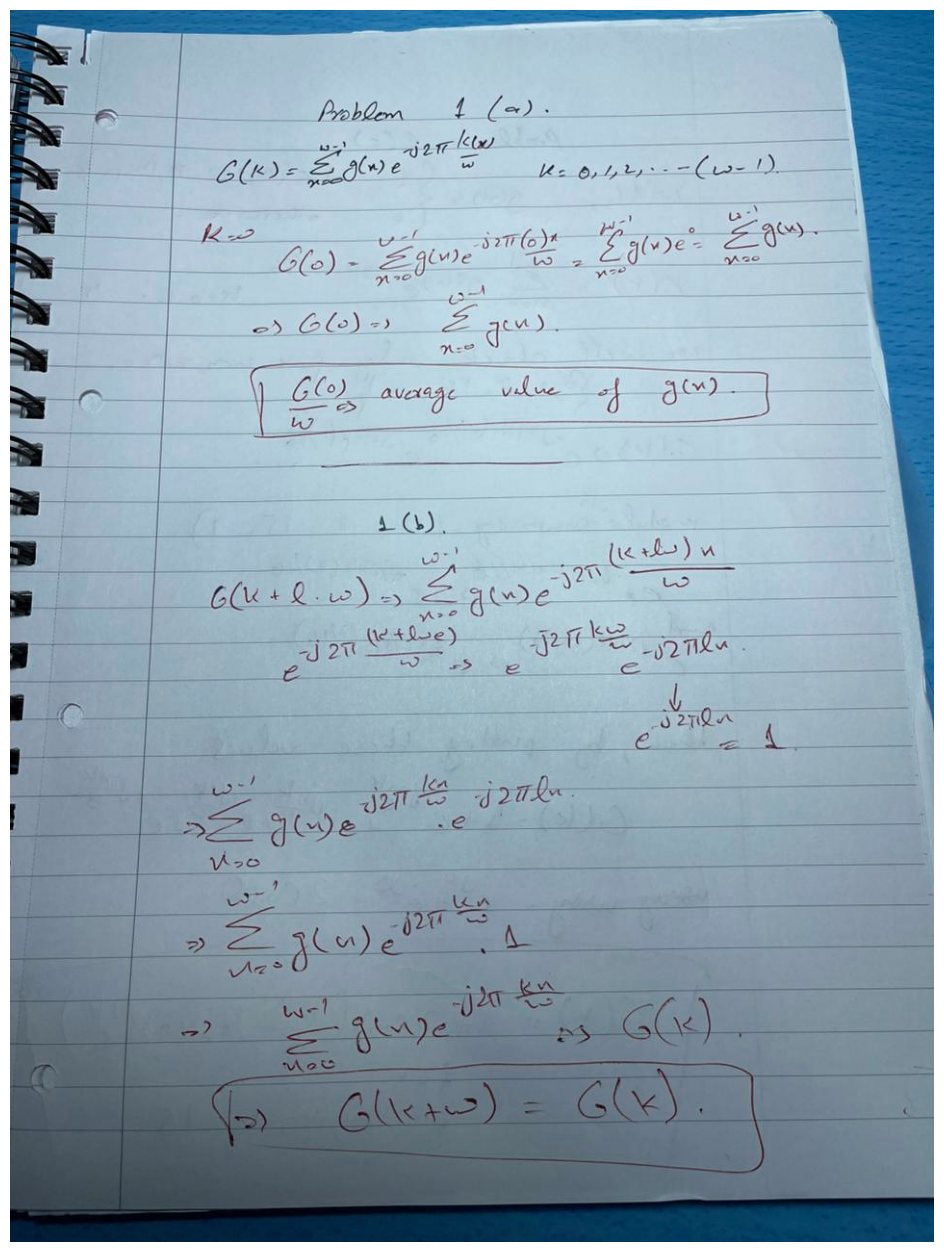

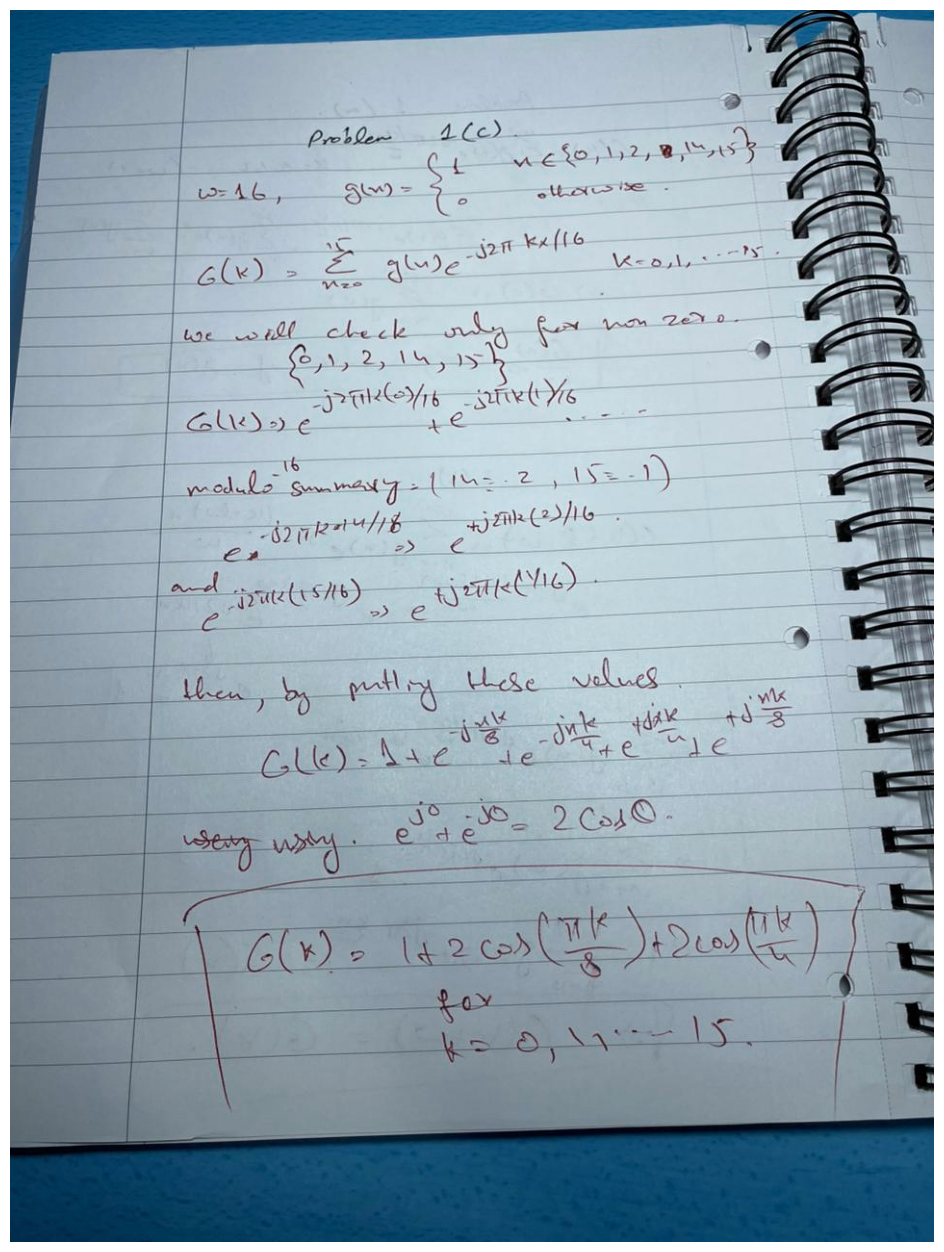

In [26]:
img1 = cv2.imread("./images/l5p2.jpg")
img2 = cv2.imread("./images/l5p1.jpg")
plt.figure(figsize=(16, 16))
plt.imshow(img1, cmap="gray")
plt.axis("off")
plt.show()
plt.figure(figsize=(16, 16))
plt.imshow(img2, cmap="gray")
plt.axis("off")
plt.show()

**Answer here**

**d)**  Use $g(x)$ as defined in **1 c)**, for $x \in [0,15]$. Use  **numpy.fft.fft**  for finding the dft, $G(k)$.  Plot both $g(x)$ and $G(k)$. Also plot the mathematical solution from probelm c) and see if / how they correspond.  

e:\msds\sem3\imageprocessing-compvision\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
e:\msds\sem3\imageprocessing-compvision\Lib\site-packages\numpy\ma\core.py:3463: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
e:\msds\sem3\imageprocessing-compvision\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


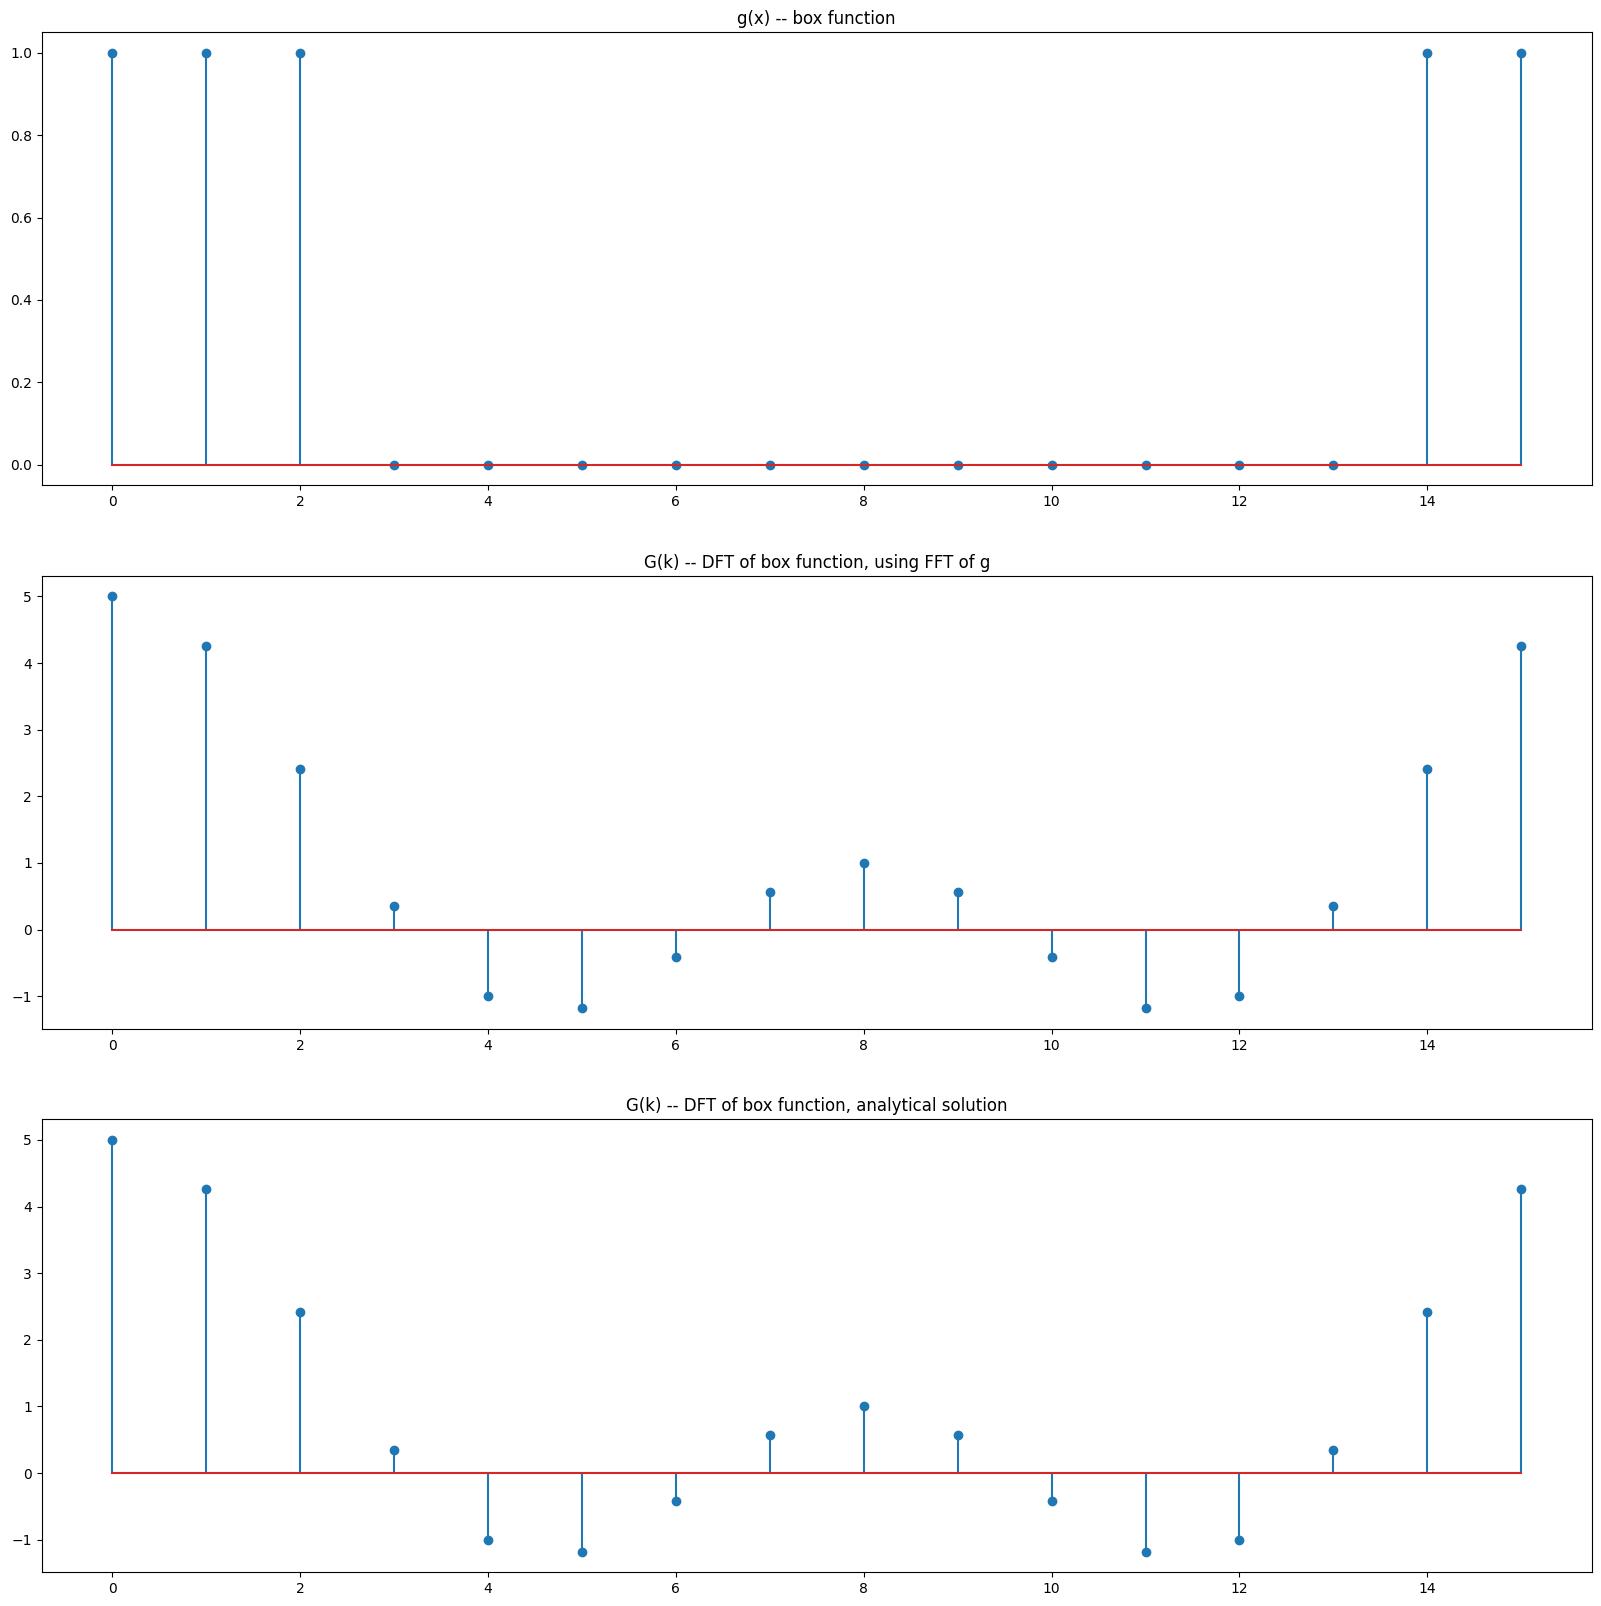

In [27]:
# Create the box function

g = np.zeros(16)
for i in [0,1,2,14,15]: 
    g[i] = 1.0

# DFT using NumPy
k = np.arange(16)
G = np.fft.fft(g) 

# DFT according to problem 1c.
G_1c = 1 + 2*np.cos(np.pi*k/8) + 2*np.cos(np.pi*k/4)

    
# Visualization
plt.figure(figsize=(20,20))
plt.subplot(311), plt.stem(g), plt.title('g(x) -- box function')
plt.subplot(312), plt.stem(G), plt.title('G(k) -- DFT of box function, using FFT of g')
plt.subplot(313), plt.stem(G_1c), plt.title('G(k) -- DFT of box function, analytical solution')
plt.show()

## Problem 2

In **Problem 1** the DFT (fft) was real - by coincidence.   In general it is complex.   In this part we will take in an image and look at it in space-domain (the image itself) and in frequency domain looking at just **the magnitude** of the DFT.

To do so, we will use the `numpy.fft.fft2` function to compute the 2D DFT of the image. Then, we will shift the zero-frequency component to the center of the spectrum with `numpy.fft.fftshift`

**a)** Import an image from your own (just for fun) as a grayscale image. If it is too big, consider resizing it. Then, fill in the cell below finding a zero mean version of the image and the DFT of both the image and the zero mean image.

In [28]:
# Import an image I as grayscale 
imagepath = "./images/BorderCollie.jpeg"
I = cv2.imread(imagepath, cv2.IMREAD_GRAYSCALE)

# Resize if needed (change the scaling factors fx and fy as required). Otherwise, comment this line. 
I = cv2.resize(I, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)   

# Remove the mean from the image I, make the zero mean image Iz.    
Iz = I - np.mean(I)

# Compute the 2D DFT of the image I and the zero-mean image Iz.  
DFT_I = np.fft.fft2(I)
DFT_Iz = np.fft.fft2(Iz)

# Shift both DFTs so that the zero-frequency component is at the center of the image.
DFT_SHIFT_I = np.fft.fftshift(DFT_I)
DFT_SHIFT_Iz = np.fft.fftshift(DFT_Iz)

# Print some examples of the shifted zero-mean DFT to see what each complex component looks like.
print(DFT_SHIFT_Iz[0, 0])

(-1182.0000000000005-3.836930773104541e-13j)


In [29]:
# For a zero-mean image, the DC component should be near zero
center_y, center_x = np.array(DFT_SHIFT_Iz.shape) // 2
print(f"DC component at center [{center_y}, {center_x}]: {DFT_SHIFT_Iz[center_y, center_x]}")
print(f"Magnitude: {np.abs(DFT_SHIFT_Iz[center_y, center_x])}")

DC component at center [46, 69]: (2.0463630789890885e-11+0j)
Magnitude: 2.0463630789890885e-11


**b)** Now you will find the magnitude of the DFT of I and Iz. You are going to make a plot where you show the image at the top, one row with the magnitude directly of I and Iz, and another where we do the scaling we do for display purposes as we talked about in class using the logarithm of (1 + magnitude(DFT)).

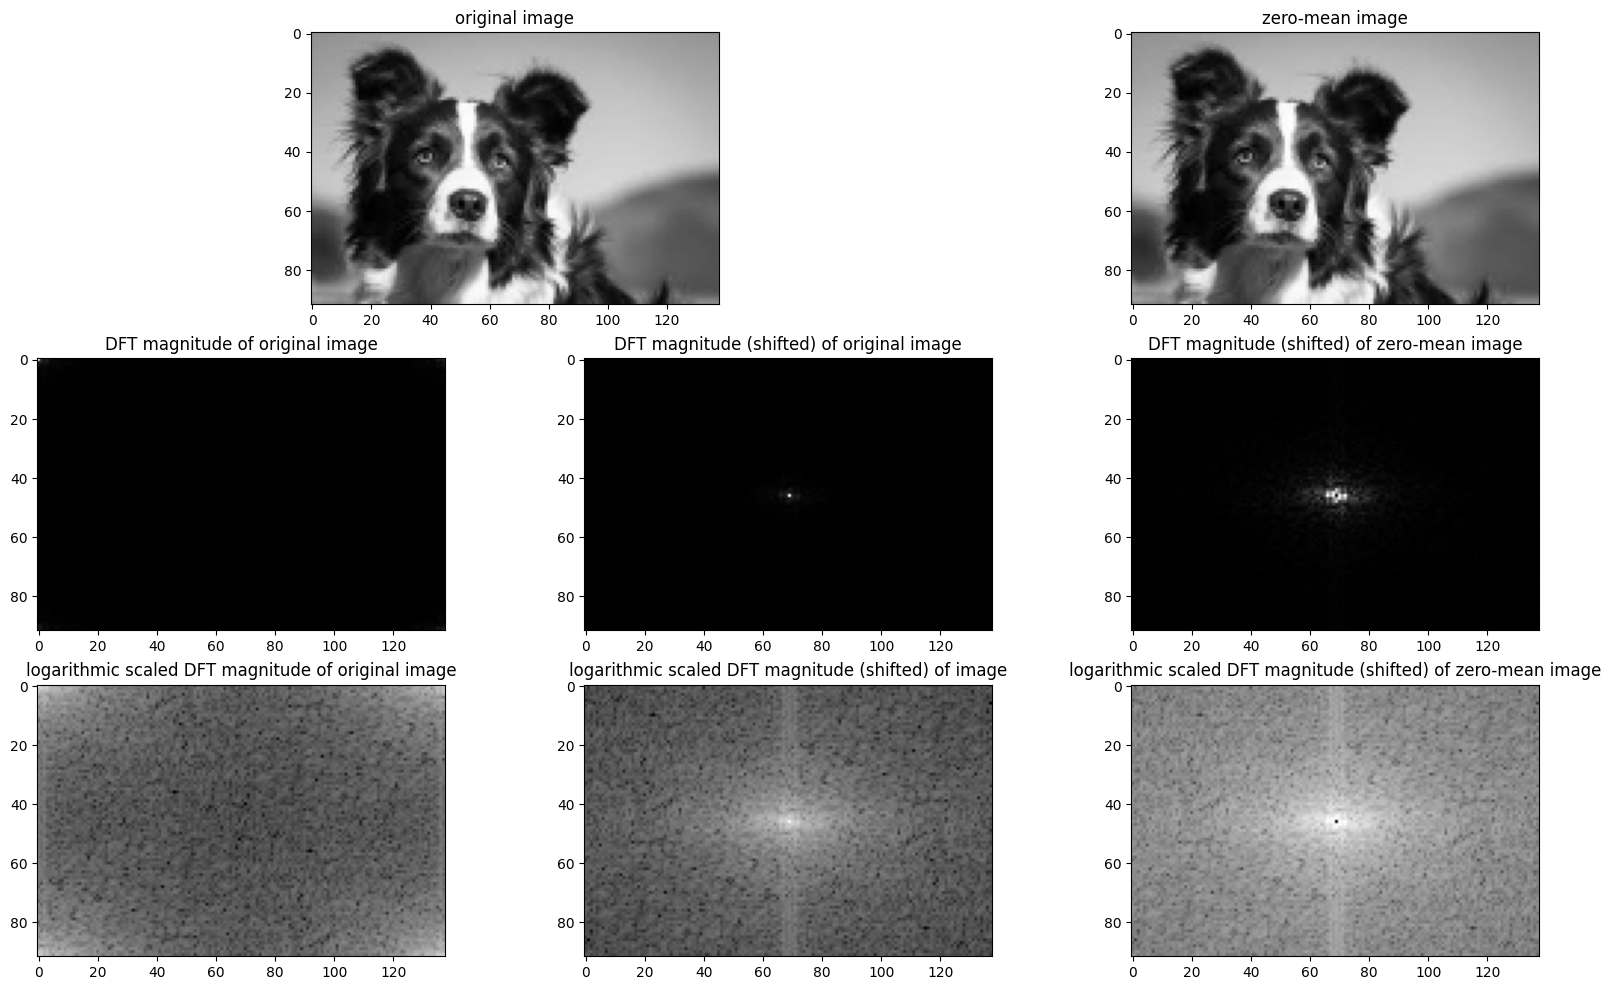

In [30]:
# Magnitudes
mag_I = np.abs(DFT_I)
mag_SHIFT_I = np.abs(DFT_SHIFT_I)
mag_SHIFT_Iz = np.abs(DFT_SHIFT_Iz)


# log scaling
log_mag_I = np.log(1 + mag_I)
log_mag_SHIFT_I = np.log(1 + mag_SHIFT_I)
log_mag_SHIFT_Iz = np.log(1 + mag_SHIFT_Iz)

# Plotting
plt.figure(figsize=(20,12))
plt.subplot(3, 3, (1,2)), plt.imshow(I, cmap="gray"), plt.title('original image')
plt.subplot(333), plt.imshow(Iz, cmap="gray"), plt.title('zero-mean image')
plt.subplot(334), plt.imshow(mag_I,cmap="gray"), plt.title('DFT magnitude of original image')
plt.subplot(335), plt.imshow(mag_SHIFT_I,cmap="gray"), plt.title('DFT magnitude (shifted) of original image')
plt.subplot(336), plt.imshow(mag_SHIFT_Iz,cmap="gray"), plt.title('DFT magnitude (shifted) of zero-mean image')
plt.subplot(337), plt.imshow(log_mag_I,cmap="gray"), plt.title('logarithmic scaled DFT magnitude of original image')
plt.subplot(338), plt.imshow(log_mag_SHIFT_I,cmap="gray"), plt.title('logarithmic scaled DFT magnitude (shifted) of image')
plt.subplot(339), plt.imshow(log_mag_SHIFT_Iz,cmap="gray"), plt.title('logarithmic scaled DFT magnitude (shifted) of zero-mean image')
plt.show()

**c)** Comment on both the differences we see in using the log scale and in the magnitude for I and Iz.

- Zero mean image provides a much better representation of the image's structular information
- the results also show the importance of log scalling 

## Problem 3

Now we will consider both the magnitude and the phase. Let's input two images, convert them to DFT, and see if we get the image back doing IDFT. We will also evaluate the importance of the phase in the Fourier trasnform by switching the phase between the images before IDFT. Since this experiment requires to have two images of the same size, we will provide you with them.

**Optional**: Feel free to use your own images as long as they are the same size (you can use cropping or rescaling before doing the DFT).

**a)**  Plot the DFT (scaled magnitude and phase). 

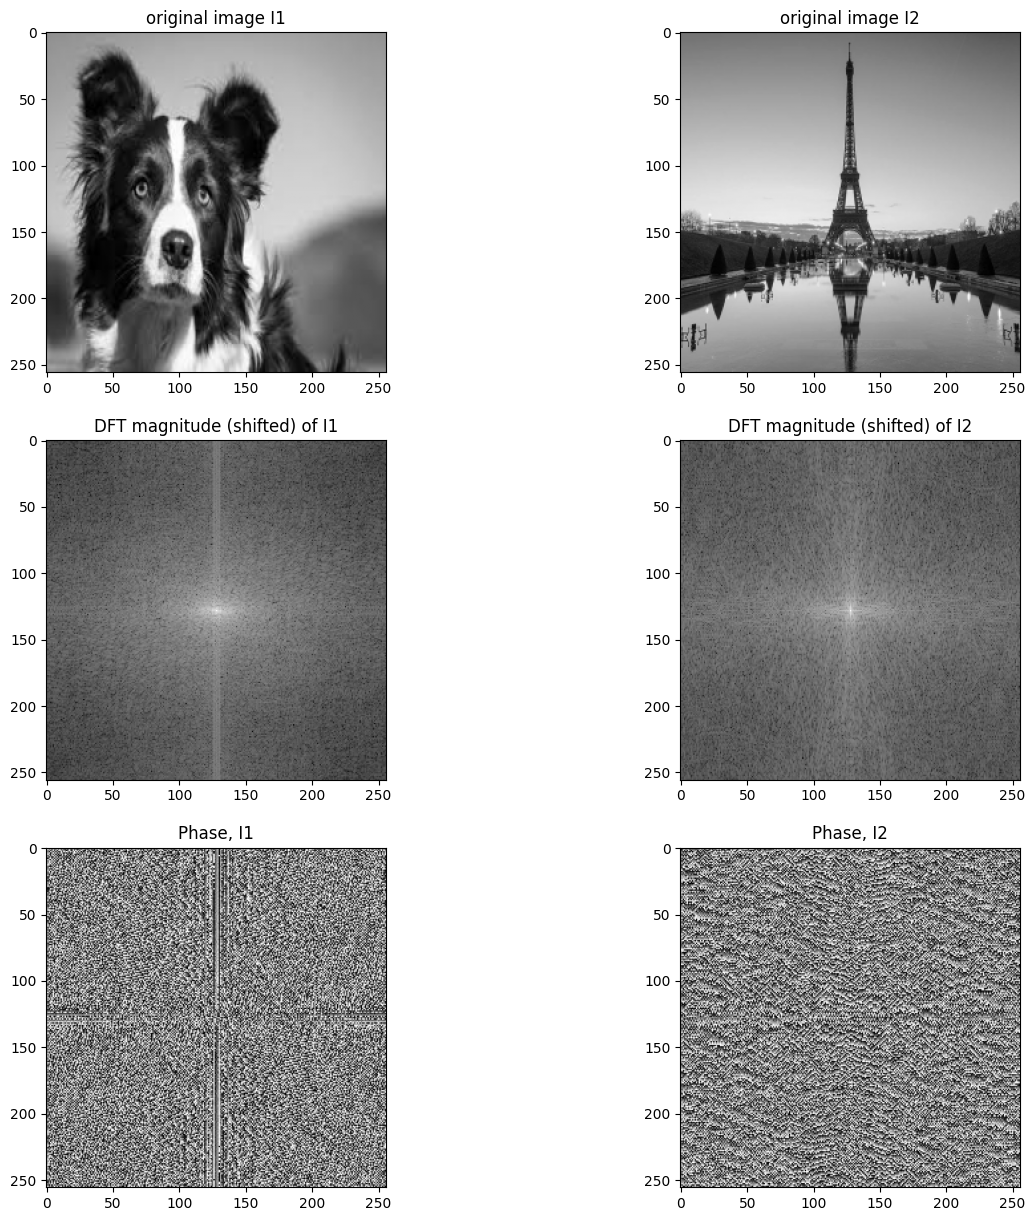

In [31]:
# Read images in grayscale
imagepath_1 = "./images/BorderCollie.jpeg"

I1 = cv2.imread(imagepath_1, cv2.IMREAD_GRAYSCALE)

imagepath_2 = "./images/Paris.jpg"

I2 = cv2.imread(imagepath_2, cv2.IMREAD_GRAYSCALE)

target_size = (256, 256) 
I1 = cv2.resize(I1, target_size, interpolation=cv2.INTER_AREA)
I2 = cv2.resize(I2, target_size, interpolation=cv2.INTER_AREA)

# Shifted DFT
DFT_I1 = np.fft.fft2(I1)
DFT_I2 = np.fft.fft2(I2)
DFT_SHIFT_I1 = np.fft.fftshift(DFT_I1)
DFT_SHIFT_I2 = np.fft.fftshift(DFT_I2)

# Magnitud and phase. Use np.angle for assessing the phase.
mag_I1 = np.log(1 + np.abs(DFT_SHIFT_I1))
mag_I2 = np.log(1 + np.abs(DFT_SHIFT_I2))
ph_I1 = np.angle(DFT_SHIFT_I1)
ph_I2 = np.angle(DFT_SHIFT_I2)

# Plotting
plt.figure(figsize=(15,15))
plt.subplot(321), plt.imshow(I1, cmap="gray"), plt.title('original image I1')
plt.subplot(322), plt.imshow(I2, cmap="gray"), plt.title('original image I2')
plt.subplot(323), plt.imshow(mag_I1, cmap="gray"), plt.title('DFT magnitude (shifted) of I1')
plt.subplot(324), plt.imshow(mag_I2, cmap="gray"), plt.title('DFT magnitude (shifted) of I2')
plt.subplot(325), plt.imshow(ph_I1, cmap="gray"), plt.title('Phase, I1')
plt.subplot(326), plt.imshow(ph_I2, cmap="gray"), plt.title('Phase, I2')
plt.show()



**b)** Reconstruct the images with the right and wrong phases. To do so, make use of `np.fft.ifft2`.

**Hint**: Reconstruction is done by applying the inverse DFT (IDFT). This is achieved by finding the DFT's real and imaginary parts with the combination of the magnitude (the original, not the scaled one) and the phase as follows:

`real_part = magnitude * np.cos(phase)`

`imaginary_part = magnitude * np.sin(phase) * 1j`

`reconstruction = real_part + imaginary_part`

Remember that the IFFT retains phase information, which is represented in the imaginary parts. In a real-valued reconstruction, this phase should align such that the imaginary part is effectively zero or negligible.

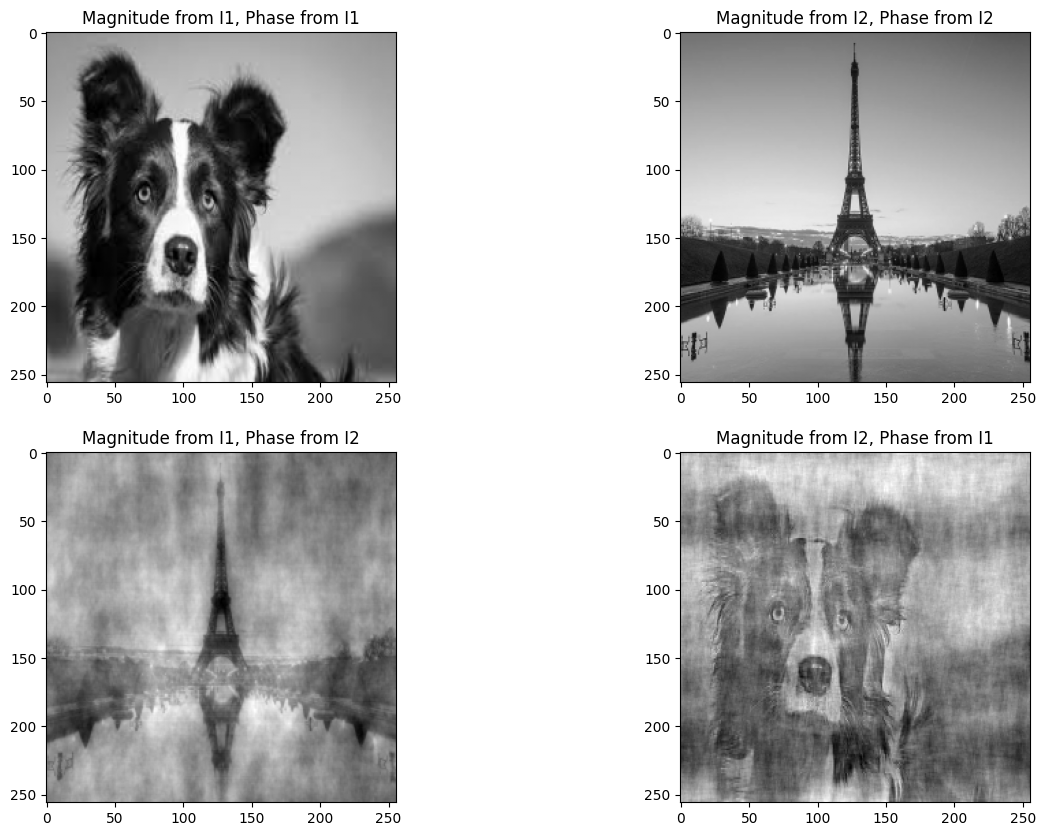

In [32]:
# IDFT for reconstruction with the right phase
real1 = np.abs(DFT_SHIFT_I1) * np.cos(ph_I1)
imag1 = np.abs(DFT_SHIFT_I1) * np.sin(ph_I1) * 1j
comp1 = real1 + imag1
rec1 = np.fft.ifft2(np.fft.ifftshift(comp1)).real # Only get the real part

real2 = np.abs(DFT_SHIFT_I2) * np.cos(ph_I2)
imag2 = np.abs(DFT_SHIFT_I2) * np.sin(ph_I2) * 1j
comp2 = real2 + imag2
rec2 = np.fft.ifft2(np.fft.ifftshift(comp2)).real # Only get the real part

# IDFT for reconstruction with the wrong phase
real1_wrong = np.abs(DFT_SHIFT_I1) * np.cos(ph_I2)
imag1_wrong = np.abs(DFT_SHIFT_I1) * np.sin(ph_I2) * 1j
comp1_wrong = real1_wrong + imag1_wrong
rec1_wrong = np.fft.ifft2(np.fft.ifftshift(comp1_wrong)).real # Only get the real part


real2_wrong = np.abs(DFT_SHIFT_I2) * np.cos(ph_I1)
imag2_wrong = np.abs(DFT_SHIFT_I2) * np.sin(ph_I1) * 1j
comp2_wrong = real2_wrong + imag2_wrong
rec2_wrong = np.fft.ifft2(np.fft.ifftshift(comp2_wrong)).real # Only get the real part

# Plotting
plt.figure(figsize=(15,10))
plt.subplot(221), plt.imshow(rec1, cmap="gray"), plt.title('Magnitude from I1, Phase from I1')
plt.subplot(222), plt.imshow(rec2, cmap="gray"), plt.title('Magnitude from I2, Phase from I2')
plt.subplot(223), plt.imshow(rec1_wrong, cmap="gray"), plt.title('Magnitude from I1, Phase from I2')
plt.subplot(224), plt.imshow(rec2_wrong, cmap="gray"), plt.title('Magnitude from I2, Phase from I1')
plt.show()

## Problem 4  

To finish this LAB, we will briefly explore the filtering process in the frequency domain. We will take the same pictures used in **Problem 3** and we will apply both an ideal low-pass filter (smoothing) and an ideal high-pass filter (differentiating) in the frequency space. 

**a)** Define and plot the ideal filters. To do so, make two matrices the same size as the images with just ones and zeros, respectively. Then, create an opaque circle marker in the middle of each matrix with the opposite values. You should end up with a matrix where the background is filled with ones and there is a circle of zeros in the middle (high-pass filter), and another matrix where the background is filled with zeros and there is a circle of ones in the middle (low-pass filter). 

That circle represents the **cutoff-frequency**, and it can be easily drawn with the `cv2.circle` function. Use the radius (in pixels) of your choice.

`cv2.circle(array, center, radius, (value_to_fill), -1)  # -1 fills the circle`

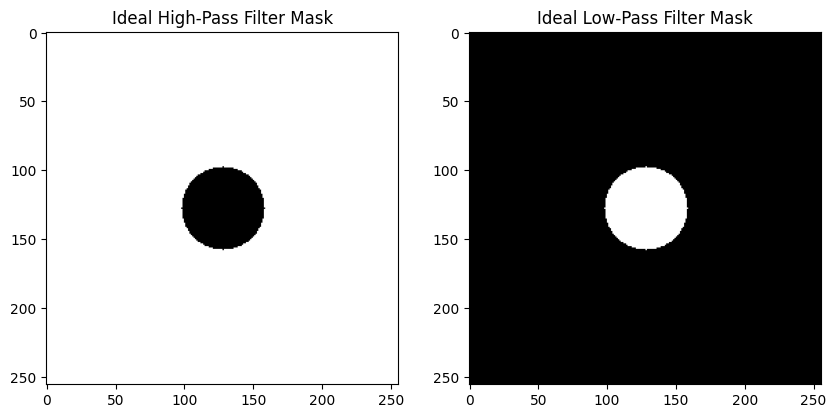

In [33]:
# Create filter
high_pass_filter = np.ones(I1.shape, dtype=np.float32)
low_pass_filter = np.zeros(I1.shape, dtype=np.float32)

# Define the center and radius of the circle
center = (I1.shape[1] // 2, I1.shape[0] // 2)
radius = 30

# Draw a circle in the middle of the background
cv2.circle(high_pass_filter, center, radius, 0, -1) # High-Pass
cv2.circle(low_pass_filter, center, radius, 1, -1)  # Low-Pass

# Plotting
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(high_pass_filter, cmap='gray'), plt.title('Ideal High-Pass Filter Mask')
plt.subplot(122), plt.imshow(low_pass_filter, cmap='gray'), plt.title('Ideal Low-Pass Filter Mask')
plt.show()

**b)** Use the low-pass filter to remove high frequencies and the high-pass filter to remove low frequencies in the frequency domain and reconstruct the images. Make use of the shifted DFT (variables *DFT_SHIFT_I1* and *DFT_SHIFT_I2* from the previous exercise) to apply the filters. Remember, convolution (filtering) in the space domain is multiplication in the frequency domain.

**Note** When transforming back to the space domain, we might get a complex image since we have tampered with the complex DFT image. For displaying purposes, plot the **magnitude** of the reconstructed image in the space-domain.


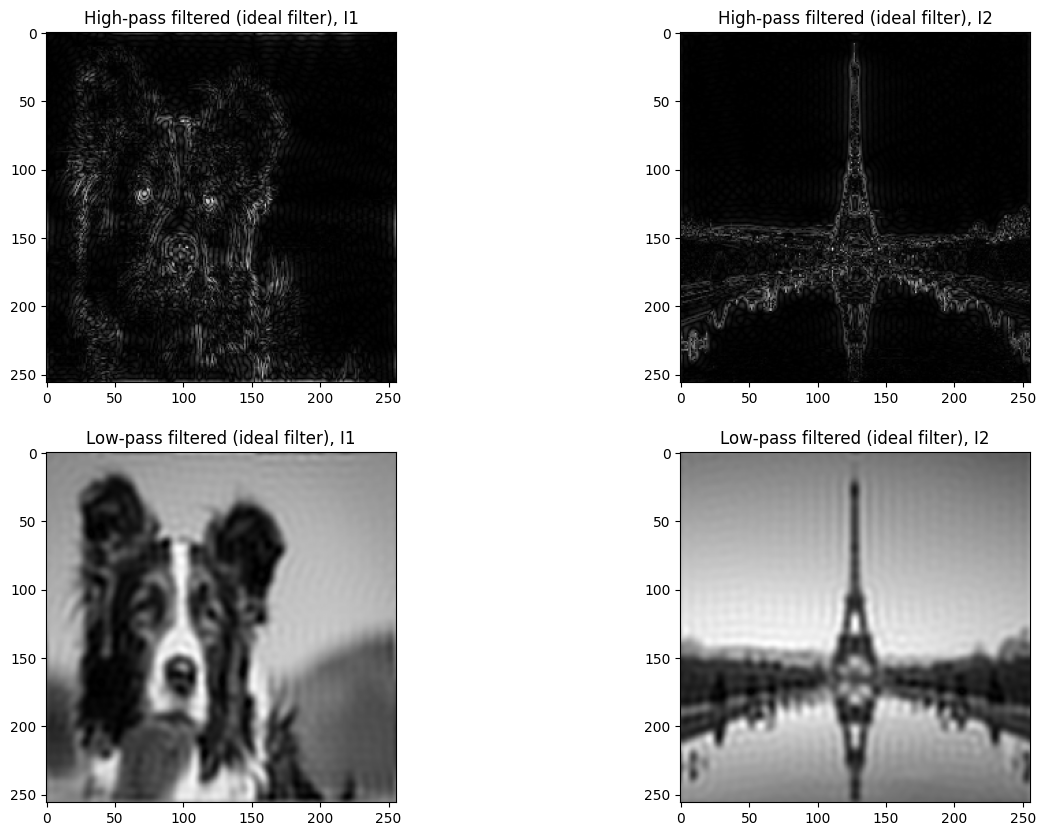

In [34]:
# Filtering
DFT_SHIFT_I1_HP = DFT_SHIFT_I1 * high_pass_filter
DFT_SHIFT_I2_HP = DFT_SHIFT_I2 * high_pass_filter
DFT_SHIFT_I1_LP = DFT_SHIFT_I1 * low_pass_filter
DFT_SHIFT_I2_LP = DFT_SHIFT_I2 * low_pass_filter

# Reconstruction (use np.abs for the magnitude)
I1_HP = np.abs(np.fft.ifft2(np.fft.ifftshift(DFT_SHIFT_I1_HP)))
I2_HP = np.abs(np.fft.ifft2(np.fft.ifftshift(DFT_SHIFT_I2_HP)))
I1_LP = np.abs(np.fft.ifft2(np.fft.ifftshift(DFT_SHIFT_I1_LP)))
I2_LP = np.abs(np.fft.ifft2(np.fft.ifftshift(DFT_SHIFT_I2_LP)))

# Plotting
plt.figure(figsize=(15, 10))
plt.subplot(221), plt.imshow(I1_HP,cmap="gray"), plt.title('High-pass filtered (ideal filter), I1')
plt.subplot(222), plt.imshow(I2_HP,cmap="gray"), plt.title('High-pass filtered (ideal filter), I2')
plt.subplot(223), plt.imshow(I1_LP,cmap="gray"), plt.title('Low-pass filtered (ideal filter), I1')
plt.subplot(224), plt.imshow(I2_LP,cmap="gray"), plt.title('Low-pass filtered (ideal filter), I2')
plt.show()

## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Md Sazidur Rahman, room E-401
E-mail: md.s.rahman@uis.no

## References


[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.